In [1]:
import gensim

import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout
from keras.layers.embeddings import Embedding

from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('baomoi.model.bin', binary=True)

In [3]:
w2v_model.vectors.shape

(439056, 400)

In [4]:
import pandas as pd

In [5]:
df = pd.read_pickle('foody_data.pkl')

In [6]:
df.shape

(174437, 13)

In [7]:
df

,time,user_name,user_link,brand_name,brand_link,review_content,review_link,avg_score,location_point,space_point,quality_point,service_point,price_point
0,14/9/2017 11:45,Sunny,https://www.foody.vn/thanh-vien/taiyo,El Sol - Meat & Wine - Võ Thị Sáu,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,Quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,8.6,7.0,10,9,9,8.0
1,14/9/2017 11:39,Nguyên Khánh,https://www.foody.vn/thanh-vien/viola_0309_tv,Busan Korean Food - Món Hàn Quốc - Đinh Tiên H...,https://www.foody.vn/ho-chi-minh/busan-korean-...,Vị trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...,https://www.foody.vn/ho-chi-minh/busan-korean-...,7.4,8.0,8,6,7,8.0
2,14/9/2017 11:34,Tú Hảo,https://www.foody.vn/thanh-vien/tuhao2509,TocoToco Bubble Tea - Cộng Hòa,https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,"Địa điểm quán dễ tìm. Không gian cũng rộng, có...",https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,6.4,7.0,8,7,7,3.0
3,14/9/2017 11:29,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Le Castella Viet Nam - Bánh Bông Lan Đài Loan ...,https://www.foody.vn/ho-chi-minh/le-castella-v...,Thấy bánh này đang hot rần rần mình cũng gọi t...,https://www.foody.vn/ho-chi-minh/le-castella-v...,7.2,7.0,6,9,6,8.0
4,14/9/2017 11:26,Tien97,https://www.foody.vn/thanh-vien/tien97,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,10.0,10.0,10,10,10,10.0
5,14/9/2017 11:22,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Gogi House - Thịt Nướng Hàn Quốc - Lê Văn Sỹ,https://www.foody.vn/ho-chi-minh/gogi-house-qu...,Hôm bữa mình và bạn vô đây ăn. Gọi 2 phần nướn...,https://www.foody.vn/ho-chi-minh/gogi-house-qu...,7.2,6.0,7,9,6,8.0
6,14/9/2017 11:07,Huyền Nguyễn,https://www.foody.vn/thanh-vien/ngochuyen17595,Dunkin' Donuts - Quang Trung,https://www.foody.vn/ho-chi-minh/dunkin-donuts...,"69k của tụi mình. 2 bánh lớn, 2 ly trà sữa 1 L...",https://www.foody.vn/ho-chi-minh/dunkin-donuts...,8.0,8.0,8,9,6,9.0
7,14/9/2017 10:56,Thùy Nguyễn,https://www.foody.vn/thanh-vien/thanhthuy3390,Koi Thé Café - Lotte Mart Nam Sài Gòn,https://www.foody.vn/ho-chi-minh/koi-the-cafe-...,Trà sữa Koi phải nói là quá ngon xuất sắc lun ...,https://www.foody.vn/ho-chi-minh/koi-the-cafe-...,8.2,9.0,7,9,8,8.0
8,14/9/2017 10:53,Ngọc Nguyễn,https://www.foody.vn/thanh-vien/ngocleminh811,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Bạn muốn giết thời gian ? Bạn chán những lúc h...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,8.8,6.0,10,10,10,8.0
9,14/9/2017 10:51,Dương,https://www.foody.vn/thanh-vien/duongduong950,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Quán nhiều game vô cùng. Nhân viên nhiệt tình ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,8.4,6.0,9,10,9,8.0


In [8]:
df['sentiment_label'] = df.avg_score.apply(lambda score: 1 if score>=5 else 0)

In [9]:
import sys
sys.path = ['/Users/admin/personal/sentiment/word_tokenize/'] + sys.path
from egs.vlsp2013_crf.word_tokenize import word_tokenize
from egs.vlsp2013_crf.word_tokenize.model import *

tokenize_model = CRFModel.instance('/Users/admin/personal/sentiment/word_tokenize/egs/vlsp2013_crf/word_tokenize/model_vlsp2013_10000.bin')
def word_tokenize(sentence, model, format='text'):
    tokens = sentence.split()
    output = model.predict(tokens)
    tokens = [token[0] for token in output]
    tags = [token[1] for token in output]
    output = []
    for tag, token in zip(tags, tokens):
        if tag == "I-W":
            output[-1] = output[-1] + " " + token
        else:
            output.append(token)
    if format == "text":
        output = u" ".join([item.replace(" ", "_") for item in output])
    return output

In [10]:
word_tokenize(df.review_content[0], tokenize_model)

'Quán steak hiếm_hoi mà mình cực_kì ưng_ý từ lâu_nay khi quán bên nguyễn_siêu, bữa nay đi thử chi_nhánh bên võ thị sáu mà ưng quá. Quán nằm trong hẻm xe_hơi_hướng võ thị sáu 1 chiều, mình đi hai bà trưng quẹo xuống, hẻm nằm gần quán cafe higland nên dễ tìm lắm. Quán có bảng_hiệu khá nhỏ nhưng do hẻm cụt nên cũng dễ nhận_biết quán. Phục_vụ niềm_nở chào_đón và phục_vụ chu đáo. Nói tới phần thức ăn: mình gọi mac cheese béo ngập phô mai 2 phần thịt steak tendeloin achentina và striploin 200g kèm salad phô mai. Phải nói là rất hài_lòng vì thịt mềm và juicy lắm, thêm cái khoản tendeloin nên bò mềm phải biết nha. Giá steak khá tốt ko quá mắc so với các nhà_hàng steak nổi_tiếng và sang chảnh nhưng steak về chất_lượng thì mình ko bàn_cãi nhiều. Hi_vọng quán vẫn giữ phong_độ và chất_lượng nha'

In [ ]:
word -> index -> vector

In [11]:
# load the whole embedding into memory
word2index = {}
embeddings_index = dict()
embedding_matrix = np.zeros((len(w2v_model.vocab), 400))

for i, word in enumerate(w2v_model.vocab):
    embeddings_index[word] = w2v_model.get_vector(word)
    
    word2index[word] = i
    
    embedding_vector = w2v_model.get_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
toi di jhoc -> [11 44 55 0 0 0 0 0 ]

In [12]:
# define documents
docs = df.review_content.tolist()

# define class labels
labels = np.array(df.sentiment_label.tolist())

# integer encode the documents
encoded_docs = []
for doc in docs:
    encoded_docs.append([word2index.get(word, 0) for word in doc.split()])

# print(encoded_docs)

# pad documents to a max length of 200 words
max_length = 200
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[    0 76150  2120 ...     0     0     0]
 [    0  3413   544 ...     0     0     0]
 [14692   142   907 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


In [13]:
padded_docs.shape

(174437, 200)

In [14]:
labels.shape

(174437,)

In [15]:
# import pickle

# with open('./padded_docs_labels.pkl', 'wb') as handle:
#     pickle.dump((padded_docs, labels), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.25, random_state=42)

In [19]:
model = Sequential()

model.add(Embedding(len(embeddings_index), 400, weights=[embedding_matrix], input_length=200, trainable=False))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))
# Adam Optimiser
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

# save the best model and early stopping
saveBestModel = keras.callbacks.ModelCheckpoint('lstm_best_weight.hdf5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

# fit the model
model.fit(X_train, y_train, epochs=10, batch_size=250, validation_split=0.25, verbose=2, callbacks=[saveBestModel])
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 400)          175622400 
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               270848    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 175,959,809
Trainable params: 337,409
Non-trainable params: 175,622,400
_________________________________________________________________
None
Train on 98120 samples, validate on 32707 samples
Epoch 1/10
 - 76s - loss: 0.2037 - acc: 0.9424 - val_loss: 0.1507 -

In [20]:
accuracy

0.955239623942197

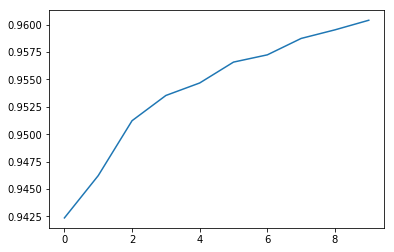

In [21]:
plt.plot(model.history.history['acc'])

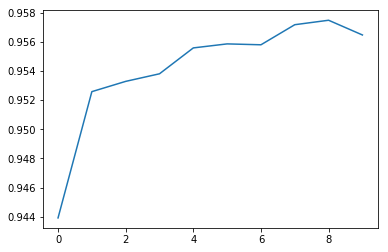

In [22]:
plt.plot(model.history.history['val_acc'])

In [ ]:
model.save_weights("lstm_weight.h5")